<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/My%20ML%20project/Salary%20Prediction/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required liabraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance

Reading Dataset using pandas liabrary

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [ ]:
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['job_title'].unique())
print(df['employee_residence'].unique())
print(df['company_location'].unique())
print(df['company_size'].unique())
print(df['work_year'].unique())

[2 3 0 1]
[2 3 0 1]
[2 3 0 1]
[2 3 0 1]
[2 3 0 1]
[2 3 0 1]
[2020 2021 2022]


In [ ]:
df['experience_level'] = pd.Categorical(df['experience_level']).codes
df['employment_type'] = pd.Categorical(df['experience_level']).codes
df['job_title'] = pd.Categorical(df['experience_level']).codes
df['employee_residence'] = pd.Categorical(df['experience_level']).codes
df['company_location'] = pd.Categorical(df['experience_level']).codes
df['company_size'] = pd.Categorical(df['experience_level']).codes
df['work_year'] = pd.Categorical(df['work_year']).codes

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,0,2,2,2,7.0,EUR,79833,2,0,2,2
1,1,0,3,3,3,26.0,USD,260000,3,0,3,3
2,2,0,3,3,3,8.5,GBP,109024,3,50,3,3
3,3,0,2,2,2,2.0,USD,20000,2,0,2,2
4,4,0,3,3,3,15.0,USD,150000,3,50,3,3


In [ ]:
df.describe()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.00000,607.000000,607.000000
mean,303.000000,1.405272,2.128501,2.128501,2.128501,32.400006,112297.869852,2.128501,70.92257,2.128501,2.128501
std,175.370085,0.692133,1.034055,1.034055,1.034055,154.435749,70957.259411,1.034055,40.70913,1.034055,1.034055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,2859.000000,0.000000,0.00000,0.000000,0.000000
25%,151.500000,1.000000,2.000000,2.000000,2.000000,7.000000,62726.000000,2.000000,50.00000,2.000000,2.000000
50%,303.000000,2.000000,2.000000,2.000000,2.000000,11.500000,101570.000000,2.000000,100.00000,2.000000,2.000000
75%,454.500000,2.000000,3.000000,3.000000,3.000000,16.500000,150000.000000,3.000000,100.00000,3.000000,3.000000
max,606.000000,2.000000,3.000000,3.000000,3.000000,3040.000000,600000.000000,3.000000,100.00000,3.000000,3.000000


Normalizing predicted label 

In [ ]:
df['salary'] = df['salary']/10000

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,0,2,2,2,0.00070,EUR,79833,2,0,2,2
1,1,0,3,3,3,0.00260,USD,260000,3,0,3,3
2,2,0,3,3,3,0.00085,GBP,109024,3,50,3,3
3,3,0,2,2,2,0.00020,USD,20000,2,0,2,2
4,4,0,3,3,3,0.00150,USD,150000,3,50,3,3


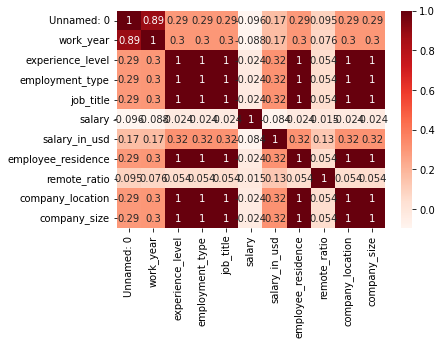

In [ ]:
plt.figure(figsize=(6,4))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [ ]:
X = df.drop(['salary',	'salary_currency',	'salary_in_usd', 'Unnamed: 0'],axis = 1)
Y = df['salary']

In [ ]:
X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,2,2,0,2,2
1,0,3,3,3,3,0,3,3
2,0,3,3,3,3,50,3,3
3,0,2,2,2,2,0,2,2
4,0,3,3,3,3,50,3,3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=5,test_size=.2)

In [ ]:
model = XGBRegressor(verbosity=0)
model.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=10)

[0]	validation_0-rmse:0.447538	validation_1-rmse:0.447079
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.402937	validation_1-rmse:0.402465
[2]	validation_0-rmse:0.362794	validation_1-rmse:0.362308
[3]	validation_0-rmse:0.326664	validation_1-rmse:0.326163
[4]	validation_0-rmse:0.294148	validation_1-rmse:0.29363
[5]	validation_0-rmse:0.264887	validation_1-rmse:0.264349
[6]	validation_0-rmse:0.238555	validation_1-rmse:0.237996
[7]	validation_0-rmse:0.214863	validation_1-rmse:0.21428
[8]	validation_0-rmse:0.193548	validation_1-rmse:0.192938
[9]	validation_0-rmse:0.174374	validation_1-rmse:0.173735
[10]	validation_0-rmse:0.157128	validation_1-rmse:0.156458
[11]	validation_0-rmse:0.141621	validation_1-rmse:0.140915
[12]	validation_0-rmse:0.127681	validation_1-rmse:0.126934
[13]	validation_0-rmse:0.115152	validation_1-rmse:0.114362
[14]	validation_0-rmse:0.10

XGBRegressor(verbosity=0)

In [ ]:
y_pred = model.predict(x_test)
# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 0.00
RMSE: 0.01


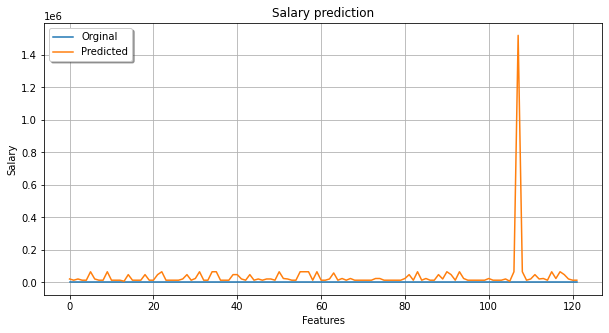

In [ ]:
x_as = range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(x_as, y_test, label='Orginal')
plt.plot(x_as, y_pred1, label='Predicted')
plt.title('Salary prediction')
plt.xlabel('Features')
plt.ylabel('Salary')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

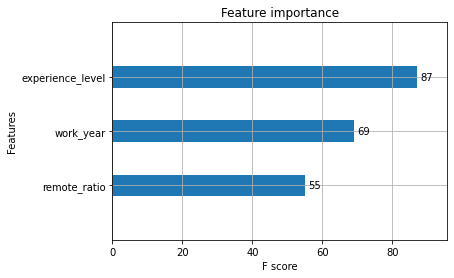

In [ ]:
plot_importance(model, height=0.4)

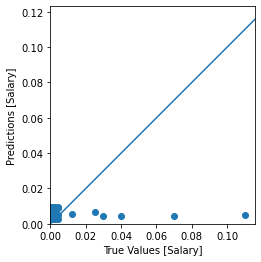

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Salary]')
plt.ylabel('Predictions [Salary]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

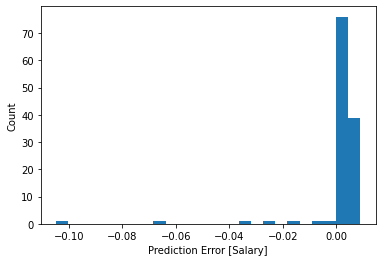

In [ ]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Salary]")
_ = plt.ylabel("Count")